In [1]:
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

%run ../../variables.ipynb
%run utils.ipynb
%run data_utils.ipynb
%run image_utils.ipynb

In [7]:
ref = cv2.imread("/home/souhila/nvme-storage/ATLAS/RA_V2/tmp/RA_ABRY_0001.png", cv2.IMREAD_GRAYSCALE)


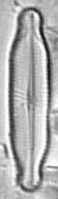

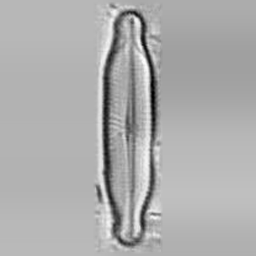

NameError: name 'OUTPUT_TMP' is not defined

In [8]:
ref_square = convert_to_square(ref, new_size=256).astype("uint8")
display(Image.fromarray(ref))
display(Image.fromarray(ref_square))
cv2.imwrite(os.path.join(OUTPUT_TMP, "to_square_1.png"), ref)
cv2.imwrite(os.path.join(OUTPUT_TMP, "to_square_2.png"), ref_square)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,
                         rotation_range=90, 
                         brightness_range=[0.8,1.2], 
                         horizontal_flip=True, 
                         vertical_flip=True,
                         fill_mode='nearest',
                         width_shift_range=30,
                         height_shift_range=30,
                         zoom_range=0.2,
                         data_format="channels_last")

x=[]
x.append(ref_square)
x = np.array(x)
flow = datagen.flow(x, batch_size=9)

In [ ]:
i = 0
stop = True
result = []
for batch in flow:
    image = (batch[0,:,:,:]*255).astype('uint8')
    #display(Image.fromarray(image))
    result.append(image)
    i+=1
    if i>8:
        break
result = np.array(result)


In [ ]:
stack01 = np.hstack((result[0,:,:,:], result[1,:,:,:], result[2,:,:,:]))
stack02 = np.hstack((result[3,:,:,:], result[4,:,:,:], result[5,:,:,:]))
stack03 = np.hstack((result[6,:,:,:], result[7,:,:,:], result[8,:,:,:]))
grid = np.vstack((stack01, stack02, stack03))
#display(Image.fromarray(grid))
cv2.imwrite(os.path.join(OUTPUT_TMP, "bonjour.png"), grid)